In [1]:
import pandas as pd
import numpy as np

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

def get_metric_values(df, input_type, metric_name):
    if input_type not in df["input_type"].unique():
        raise ValueError(f"'{input_type}' is not a valid input_type. "
                         f"Available: {df['input_type'].unique().tolist()}")
    if metric_name not in df["metric_name"].unique():
        raise ValueError(f"'{metric_name}' is not a valid metric_name. "
                         f"Available: {df['metric_name'].unique().tolist()}")
    
    metric_values = df[(df["input_type"] == input_type) &
                       (df["metric_name"] == metric_name)]["value"]
    return metric_values.values

def read_metrics(experiment_key: str) -> [pd.DataFrame, int]:
    experiment_metrics = pd.read_csv(f"loggs/{experiment_key}/metrics.csv")
    num_loged_epochs = experiment_metrics["epoch"].max() + 1
    return experiment_metrics, num_loged_epochs

def get_model_norm(results):
    return results[results["metric_name"] == "weights_l2"] \
        .groupby("epoch")["value"] \
        .apply(lambda x: np.sqrt((x**2).sum())).values

## Figure 15a

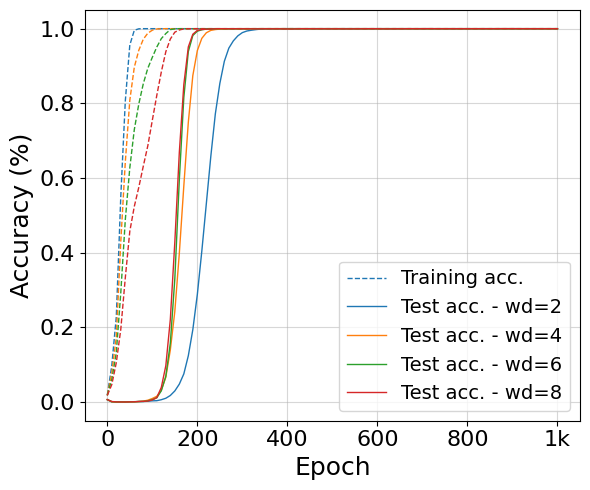

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

log_frequency = 10
train_acc = []
test_acc = []

for wd in range(2, 10, 2):
    experiment_key = f'add_mod|num_epochs-1001|train_fraction-0.4|log_frequency-10|lr-0.01|batch_size-5107|weight_decay-{wd}.0'
    experiment_metrics, num_logged_epochs = read_metrics(experiment_key)
    epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)

    train_acc.append(get_metric_values(experiment_metrics, "train", "accuracy"))
    test_acc.append(get_metric_values(experiment_metrics, "test", "accuracy"))

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(epochs, train_acc[0], linestyle='--', linewidth=1, label='Training acc.')
for acc in train_acc[1:]:
    ax.plot(epochs, acc, linestyle='--', linewidth=1)

plt.gca().set_prop_cycle(None)

for wd, acc in zip(range(2, 10, 2), test_acc):
    ax.plot(epochs, acc, linewidth=1, label=f'Test acc. - wd={wd}')

ax.set_xlabel('Epoch', fontsize=18)
ax.set_ylabel('Accuracy (%)', fontsize=18)

ax.grid(alpha=0.5)
ax.legend(fontsize=14, loc="lower right")

ax.xaxis.set_major_formatter(FuncFormatter(format_func))

ax.set_xticks(epochs[::20])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('figure_15a.png')
plt.show()

## Figure 15a (zoom-in)

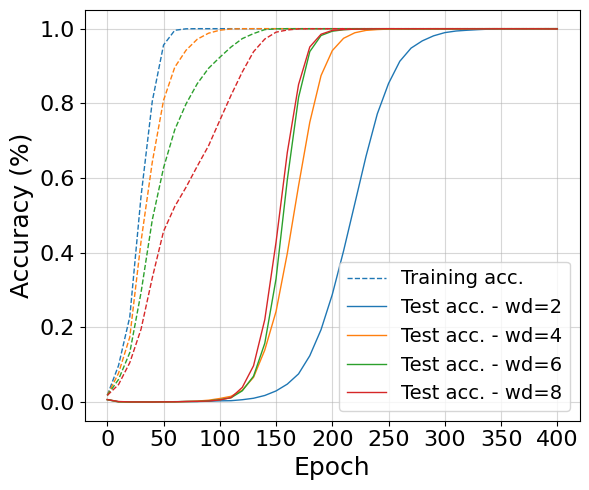

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

log_frequency = 10
train_acc = []
test_acc = []
epochs = range(0, 401, log_frequency)

for wd in range(2, 10, 2):
    experiment_key = f'add_mod|num_epochs-1001|train_fraction-0.4|log_frequency-10|lr-0.01|batch_size-5107|weight_decay-{wd}.0'
    experiment_metrics, num_logged_epochs = read_metrics(experiment_key)
    
    train_acc.append(get_metric_values(experiment_metrics, "train", "accuracy"))
    test_acc.append(get_metric_values(experiment_metrics, "test", "accuracy"))

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(epochs, train_acc[0][:len(epochs)], linestyle='--', linewidth=1, label='Training acc.')
for acc in train_acc[1:]:
    ax.plot(epochs, acc[:len(epochs)], linestyle='--', linewidth=1)

plt.gca().set_prop_cycle(None)

for wd, acc in zip(range(2, 10, 2), test_acc):
    ax.plot(epochs, acc[:len(epochs)], linewidth=1, label=f'Test acc. - wd={wd}')

ax.set_xlabel('Epoch', fontsize=18)
ax.set_ylabel('Accuracy (%)', fontsize=18)

ax.grid(alpha=0.5)
ax.legend(fontsize=14, loc="lower right")

ax.xaxis.set_major_formatter(FuncFormatter(format_func))

ax.set_xticks(epochs[::5])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('figure_15a_zoom_in.png')
plt.show()